In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
sns.set_style("ticks")

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples-2.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
river='Portage_R'

In [4]:
location = (41.505093, -83.094421)

In [5]:
delta_xy = 0.5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [6]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride")  & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2841, 63)

In [7]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [66]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
['21OHIO_WQX-S99Q01', False],
['21OHIO_WQX-S02S23', False],
['21OHIO_WQX-S02S14', False],
['21OHIO_WQX-S02P06', False],
['21OHIO_WQX-S02S16', False],
["21OHIO_WQX-S02S03", False],
["21OHIO_WQX-S02S05", False],
["USGS-04195820", True],
["USGS-04195820", True],
]

ignore_indx = [6,]

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    coef_r = 5
    a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0]+a, 
                            st_df.LongitudeMeasure.values[0]+b], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
#         location=[st_df.LatitudeMeasure.values[0]+0.0235+a,st_df.LongitudeMeasure.values[0]-0.1026+b], # 10 km
#         location=[st_df.LatitudeMeasure.values[0]+0.0135+a,st_df.LongitudeMeasure.values[0]-0.0526+b], # 5km
        location=[st_df.LatitudeMeasure.values[0]+0.0065+a,st_df.LongitudeMeasure.values[0]-0.026+b], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031+a,st_df.LongitudeMeasure.values[0]-0.013+b], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m






21OHIO_WQX-S99Q01
21OHIO_WQX-S02S23
21OHIO_WQX-S02S14
21OHIO_WQX-S02P06
21OHIO_WQX-S02S16
21OHIO_WQX-S02S03
21OHIO_WQX-S02S05
USGS-04195820
USGS-04195820


In [67]:
selected_stations = [s[0] for s in Show_IDS]
selected_stations = [
"21OHIO_WQX-S99Q01",
"21OHIO_WQX-S02S23",
"21OHIO_WQX-S02S14",
"21OHIO_WQX-S02P06",
"21OHIO_WQX-S02S16",
"21OHIO_WQX-S02S03",
"21OHIO_WQX-S02S05",
"USGS-04195820",
"HTLP (NCWQR)",
]

In [68]:
# selected_stations = selected_stations[:-1] + ['HTLP (NCWQR)']

In [69]:
WQP_name = "Chloride"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(62, 63)

In [70]:
df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Cl_Portage_River_Data.csv')

df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
df_heideleberg['ResultMeasureValue']=df_heideleberg['Chloride, mg/L']
df_heideleberg['ResultMeasureValue'] = df_heideleberg['ResultMeasureValue']*(df_heideleberg['ResultMeasureValue']<500)
df_heideleberg['ResultMeasureValue'] = pd.to_numeric(df_heideleberg['ResultMeasureValue'])
df_heideleberg['ActivityStartDate'] = pd.to_datetime(df_heideleberg['ActivityStartDate'])
sp= sp.append(df_heideleberg) 
sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
sp['Station']=sp['MonitoringLocationIdentifier']
sp.shape


(2753, 67)

In [71]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [72]:
len(selected_stations)

9

In [73]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array([nan, 'mg/l'], dtype=object)

In [74]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

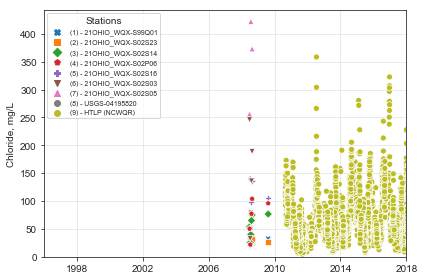

In [118]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', style='MonitoringLocationIdentifier')
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_meas.pdf')



In [76]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(1).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &   mean &    std &    min &    25\% &    50\% &    75\% &    max \\
MonitoringLocationIdentifier &         &        &        &        &        &        &        &        \\
\midrule
21OHIO\_WQX-S99Q01            &    11.0 &   32.1 &    1.8 &   29.9 &   30.9 &   32.2 &   32.5 &   35.1 \\
21OHIO\_WQX-S02S23            &     8.0 &   28.1 &    4.1 &   24.7 &   24.8 &   25.8 &   32.4 &   33.5 \\
21OHIO\_WQX-S02S14            &    11.0 &   54.0 &   19.3 &   25.2 &   39.8 &   53.5 &   70.1 &   76.7 \\
21OHIO\_WQX-S02P06            &    11.0 &   64.1 &   29.7 &   21.9 &   50.4 &   51.0 &   86.6 &  104.0 \\
21OHIO\_WQX-S02S16            &    11.0 &   78.0 &   40.1 &   21.2 &   54.6 &   66.4 &  101.8 &  136.0 \\
21OHIO\_WQX-S02S03            &     6.0 &  136.4 &   76.0 &   32.9 &   92.9 &  136.0 &  175.8 &  246.0 \\
21OHIO\_WQX-S02S05            &     4.0 &  298.2 &  125.3 &  142.0 &  227.5 &  314.5 &  385.2 &  422.0 \\
USGS-04195820             

In [77]:
selected_stations

['21OHIO_WQX-S99Q01',
 '21OHIO_WQX-S02S23',
 '21OHIO_WQX-S02S14',
 '21OHIO_WQX-S02P06',
 '21OHIO_WQX-S02S16',
 '21OHIO_WQX-S02S03',
 '21OHIO_WQX-S02S05',
 'USGS-04195820',
 'HTLP (NCWQR)']

In [78]:
master_stations = [st[0] for st in Show_IDS if st[1]]
master_stations = ['HTLP (NCWQR)']
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(2691, 67)

In [79]:
master_st_df.groupby('ActivityStartDate').mean().shape

(2691, 8)

In [80]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)



### Discharge

In [83]:
# Finde station here:
# https://www.hydrocloud.org
site = '04195820'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [84]:
discharge.columns

Index(['USGS:04195820:00060:00003', 'USGS:04195820:00060:00003_qualifiers'], dtype='object')

In [85]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [86]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [87]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [88]:
# discharge = discharge.append(df_Q_heideleberg)

In [89]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [90]:
river

'Portage_R'

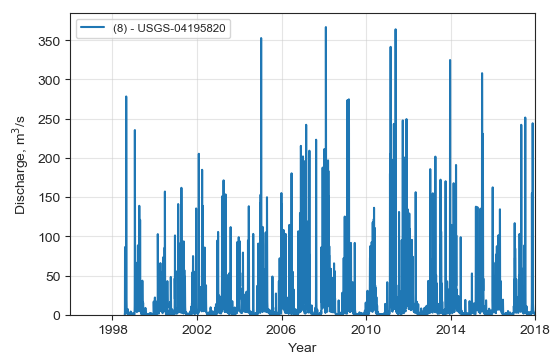

In [91]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(8) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Q.pdf')





In [92]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [106]:
river

'Portage_R'

In [107]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


In [108]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


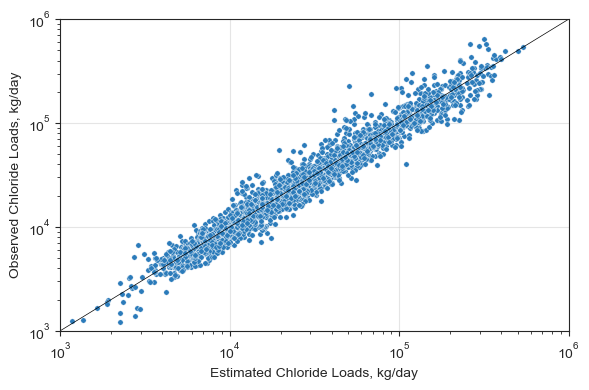

In [109]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e3, 1e6
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_FvsF.pdf')


In [110]:
EGRET_Daily = EGRET_Daily.drop([4290])

In [111]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [112]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1998,31.00000,25.748833,54298.00000,8.491803,244.000000,1998.664498,1784.491803,31.00000,1.584110,28.304122,36.896969,3.248051,0.220421,29.536895,24306.812058,39.867516,7675.965778,8871.986401,2271.981611
1,1999,244.00000,10.508335,54511.00000,6.526027,183.838356,1999.248059,1791.501370,244.00000,0.833671,10.511875,10.564244,3.661441,0.229136,41.577758,23099.040522,36.222002,29153.793120,8431.149790,2439.724385
2,2000,609.50000,9.816708,54876.50000,6.513661,183.500000,2000.248661,1803.497268,609.50000,1.100008,9.789050,9.703962,3.657038,0.226891,41.745871,23176.080929,37.966583,29964.743279,8459.269539,2243.981763
3,2001,975.00000,10.617211,55242.00000,6.526027,183.838356,2001.248146,1815.501370,975.00000,1.218789,10.635809,10.651978,3.655656,0.232843,41.617318,25068.567131,39.860077,30690.477450,9150.027003,2591.551085
4,2002,1340.00000,14.378717,55607.00000,6.526027,183.838356,2002.248059,1827.501370,1340.00000,1.384704,14.371512,14.425976,3.659287,0.238963,43.441172,30878.850821,41.825156,31501.540415,11270.780550,3283.776661
5,2003,1705.00000,14.491453,55972.00000,6.526027,183.838356,2003.248059,1839.501370,1705.00000,1.560965,14.482198,14.460364,3.656509,0.232801,41.985884,32723.070040,43.898519,32346.325779,11943.920565,3353.516165
6,2004,2070.50000,11.925052,56337.50000,6.513661,183.500000,2004.248661,1851.497268,2070.50000,1.527000,11.949964,11.969247,3.694507,0.235143,43.644978,28130.628297,46.046359,33284.504290,10267.679328,2888.868159
7,2005,2436.00000,17.246294,56703.00000,6.526027,183.838356,2005.248146,1863.501370,2436.00000,1.508397,17.144742,17.060371,3.743608,0.238852,46.833606,37098.722364,48.384933,34140.745817,13541.033663,4098.521298
8,2006,2801.00000,14.388100,57068.00000,6.526027,183.838356,2006.248059,1875.501370,2801.00000,1.492438,14.476248,14.528907,3.795172,0.233859,48.983453,33709.917402,50.799946,35089.992808,12304.119852,3521.529303
9,2007,3166.00000,20.007164,57433.00000,6.526027,183.838356,2007.248059,1887.501370,3166.00000,1.700570,20.019590,20.041744,3.761306,0.242716,49.233358,41265.009576,53.339026,36079.493626,15061.728495,4514.572398


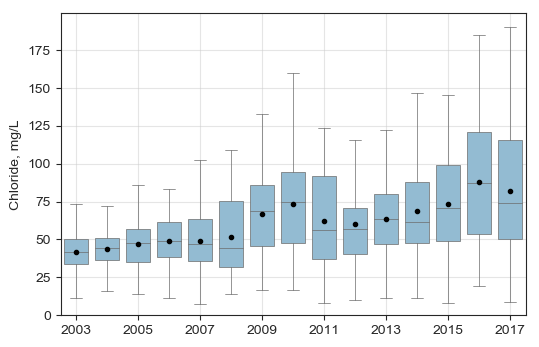

In [113]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl.pdf')




In [114]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
1998,31.00000,25.748833,54298.00000,8.491803,244.000000,1998.664498,1784.491803,31.00000,1.584110,28.304122,36.896969,3.248051,0.220421,29.536895,24306.812058,39.867516,7675.965778,8871.986401,2271.981611
1999,244.00000,10.508335,54511.00000,6.526027,183.838356,1999.248059,1791.501370,244.00000,0.833671,10.511875,10.564244,3.661441,0.229136,41.577758,23099.040522,36.222002,29153.793120,8431.149790,2439.724385
2000,609.50000,9.816708,54876.50000,6.513661,183.500000,2000.248661,1803.497268,609.50000,1.100008,9.789050,9.703962,3.657038,0.226891,41.745871,23176.080929,37.966583,29964.743279,8459.269539,2243.981763
2001,975.00000,10.617211,55242.00000,6.526027,183.838356,2001.248146,1815.501370,975.00000,1.218789,10.635809,10.651978,3.655656,0.232843,41.617318,25068.567131,39.860077,30690.477450,9150.027003,2591.551085
2002,1340.00000,14.378717,55607.00000,6.526027,183.838356,2002.248059,1827.501370,1340.00000,1.384704,14.371512,14.425976,3.659287,0.238963,43.441172,30878.850821,41.825156,31501.540415,11270.780550,3283.776661
2003,1705.00000,14.491453,55972.00000,6.526027,183.838356,2003.248059,1839.501370,1705.00000,1.560965,14.482198,14.460364,3.656509,0.232801,41.985884,32723.070040,43.898519,32346.325779,11943.920565,3353.516165
2004,2070.50000,11.925052,56337.50000,6.513661,183.500000,2004.248661,1851.497268,2070.50000,1.527000,11.949964,11.969247,3.694507,0.235143,43.644978,28130.628297,46.046359,33284.504290,10267.679328,2888.868159
2005,2436.00000,17.246294,56703.00000,6.526027,183.838356,2005.248146,1863.501370,2436.00000,1.508397,17.144742,17.060371,3.743608,0.238852,46.833606,37098.722364,48.384933,34140.745817,13541.033663,4098.521298
2006,2801.00000,14.388100,57068.00000,6.526027,183.838356,2006.248059,1875.501370,2801.00000,1.492438,14.476248,14.528907,3.795172,0.233859,48.983453,33709.917402,50.799946,35089.992808,12304.119852,3521.529303


In [115]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




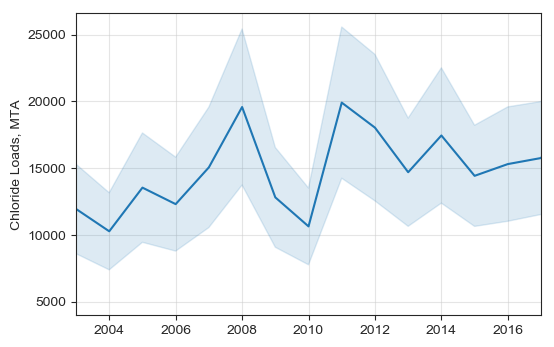

In [116]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_Flux.pdf')


In [117]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
      5  &       6  &       7  &       8  &       9  &       10 &       11 &       12 &       13 &       14 &       15 &       16 &       17 &       18 &       19 \\
\midrule
  2003.0 &   2004.0 &   2005.0 &   2006.0 &   2007.0 &   2008.0 &   2009.0 &   2010.0 &   2011.0 &   2012.0 &   2013.0 &   2014.0 &   2015.0 &   2016.0 &   2017.0 \\
 11943.9 &  10267.7 &  13541.0 &  12304.1 &  15061.7 &  19583.1 &  12810.7 &  10635.3 &  19913.2 &  18037.9 &  14696.3 &  17451.0 &  14425.8 &  15306.3 &  15761.1 \\
  3353.5 &   2888.9 &   4098.5 &   3521.5 &   4514.6 &   5847.5 &   3738.7 &   2878.0 &   5668.3 &   5489.1 &   4056.4 &   5071.9 &   3791.1 &   4286.4 &   4234.3 \\
\bottomrule
\end{tabular}

